#创建试验样本数据

希望你在学习本书时用自己的数据来试验，如果实在没有数据，下面就介绍如何用scikit-learn创建一些试验用的样本数据（toy data）。

<!-- TEASER_END -->

##Getting ready

与前面获取内置数据集，获取新数据集的过程类似，创建样本数据集，用`make_数据集名称`函数。这些数据集都是人造的：

In [1]:
from sklearn import datasets

datasets.make_*?

```
datasets.make_biclusters
datasets.make_blobs
datasets.make_checkerboard
datasets.make_circles
datasets.make_classification
datasets.make_friedman1
datasets.make_friedman2
datasets.make_friedman3
datasets.make_gaussian_quantiles
datasets.make_hastie_10_2
datasets.make_low_rank_matrix
datasets.make_moons
datasets.make_multilabel_classification
datasets.make_regression
datasets.make_s_curve
datasets.make_sparse_coded_signal
datasets.make_sparse_spd_matrix
datasets.make_sparse_uncorrelated
datasets.make_spd_matrix
datasets.make_swiss_roll
```

为了简便，下面我们用`d`表示`datasets`，`np`表示`numpy`：

In [1]:
import sklearn.datasets as d
import numpy as np

##How to do it...

这一节将带你创建几个数据集；在后面的*How it works...*一节，我们会检验这些数据集的特性。除了样本数据集，后面还会创建一些具有特定属性的数据集来显示算法的特点。

首先，我们创建回归（regression）数据集：

In [2]:
reg_data = d.make_regression()
reg_data[0].shape,reg_data[1].shape

((100, 100), (100,))

`reg_data`默认是一个元组，第一个元素是$100\times100$的矩阵——100个样本，每个样本10个特征（自变量），第二个元素是1个因变量，对应自变量的样本数量，也是100个样本。然而，默认情况下，只有10个特征与因变量的相关（参数`n_informative`默认值是10），其他90个特征都与。

可以自定义更复杂的数据集。比如，创建一个$1000\times10$的矩阵，5个特征与因变量相关，误差系数0.2，两个因变量。代码如下所示：

In [3]:
complex_reg_data = d.make_regression(1000, 10, 5, 2, 1.0)
complex_reg_data[0].shape,complex_reg_data[1].shape

((1000, 10), (1000, 2))

分类数据集也很容易创建。很容易创建一个基本均衡分类集，但是这种情况现实中几乎不可能发生——大多数用户不会改变消费习惯，大多数交易都不是虚假的，等等。因此，创建一个非均衡数据集更有意义：

In [4]:
classification_set = d.make_classification(weights=[0.1])
np.bincount(classification_set[1])

array([10, 90], dtype=int64)

聚类数据集也可以创建。有一些函数可以为不同聚类算法创建对应的数据集。例如，`blobs`函数可以轻松创建K-Means聚类数据集：

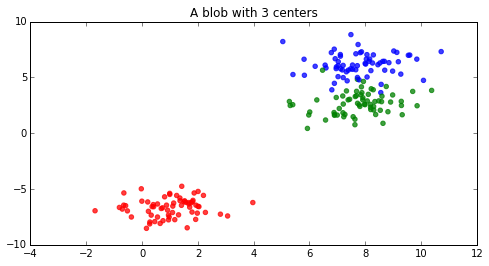

In [5]:
%matplotlib inline
import sklearn.datasets as d
from matplotlib import pyplot as plt
import numpy as np

blobs = d.make_blobs(200)

f = plt.figure(figsize=(8, 4))

ax = f.add_subplot(111)
ax.set_title("A blob with 3 centers")

colors = np.array(['r', 'g', 'b'])
ax.scatter(blobs[0][:, 0], blobs[0][:, 1], color=colors[blobs[1].astype(int)], alpha=0.75)

##How it works...

下面让我们从源代码看看scikit-learn是如何生成回归数据集的。下面任何未重新定义的参数都使用`make_regression`函数的默认值。

其实非常简单。首先，函数调用时生成一个指定维度的随机数组。

In [7]:
X = np.random.randn(n_samples, n_features)

对于基本均衡数据集，其目标数据集生成方法是：

In [ ]:
ground_truth = np.zeroes((np_samples, n_target))
ground_truth[:n_informative, :] = 100*np.random.rand(n_informative,
n_targets)

然后`X`和`ground_truth`点积加上`bias`就得到了`y`：

In [ ]:
y = np.dot(X, ground_truth) + bias

>点积是一种基本的矩阵运算$A_{m \times n} \cdot B_{n \times s} = C_{m \times s}$。因此，`y`数据集里面样本数量是`n_samples`，即数据集的行数，因变量数量是`n_target`。

由于Numpy的传播操作（broadcasting），`bias`虽然是标量，也会被增加到矩阵的每个元素上。增加噪声和数据混洗都很简单。这样试验用的回归数据集就完美了。